In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json

# Import the API key
from config import weather_api_key

# Use the citipy module to determine city/country based on latitude and longitude
from citipy import citipy

# Import the datetime module from the datetime library
from datetime import datetime

In [2]:
# Calling URL for Weather Map API
url = 'http://api.openweathermap.org/data/2.5/weather?' + '&units=Imperial' + '&APPID=' + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?&units=Imperial&APPID=301e2a0e37df04b311a4e670a20a4da2


In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

602

In [8]:
# Create an empty list to hold the weather date
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({'City': city,
                          'Country': city_country,
                          'Date': city_date,
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind})

        # If an error is experienced, skip the city
    except:
        print("City not found. Skipping..." + city)
        pass

    # Indicate that Data Loading is complete.

    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lata
Processing Record 2 of Set 1 | saint george
City not found. Skipping...taolanaro
Processing Record 3 of Set 1 | taolanaro
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | karabulak
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | alofi
Processing Record 9 of Set 1 | luderitz
Processing Record 10 of Set 1 | strezhevoy
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | chicama
Processing Record 13 of Set 1 | ichinohe
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | leshukonskoye
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | ancud
Pr

Processing Record 35 of Set 4 | revelstoke
Processing Record 36 of Set 4 | faya
Processing Record 37 of Set 4 | hongjiang
Processing Record 38 of Set 4 | katsuura
Processing Record 39 of Set 4 | mehamn
Processing Record 40 of Set 4 | broome
City not found. Skipping...saleaula
Processing Record 41 of Set 4 | saleaula
City not found. Skipping...tsihombe
Processing Record 42 of Set 4 | tsihombe
Processing Record 43 of Set 4 | sept-iles
Processing Record 44 of Set 4 | port hardy
Processing Record 45 of Set 4 | brae
Processing Record 46 of Set 4 | desbiens
Processing Record 47 of Set 4 | hilo
Processing Record 48 of Set 4 | hualmay
Processing Record 49 of Set 4 | nenjiang
Processing Record 50 of Set 4 | scottsbluff
Processing Record 1 of Set 5 | carutapera
Processing Record 2 of Set 5 | veseloyarsk
Processing Record 3 of Set 5 | luanda
Processing Record 4 of Set 5 | bontang
Processing Record 5 of Set 5 | inegol
Processing Record 6 of Set 5 | manzhouli
Processing Record 7 of Set 5 | sao joao

Processing Record 17 of Set 8 | geraldton
Processing Record 18 of Set 8 | tirumullaivasal
Processing Record 19 of Set 8 | porto santo
City not found. Skipping...karaul
Processing Record 20 of Set 8 | karaul
Processing Record 21 of Set 8 | port blair
Processing Record 22 of Set 8 | yar-sale
Processing Record 23 of Set 8 | amberley
Processing Record 24 of Set 8 | olafsvik
Processing Record 25 of Set 8 | belmonte
Processing Record 26 of Set 8 | kruisfontein
Processing Record 27 of Set 8 | diego de almagro
Processing Record 28 of Set 8 | taltal
Processing Record 29 of Set 8 | udachnyy
Processing Record 30 of Set 8 | onega
Processing Record 31 of Set 8 | muswellbrook
Processing Record 32 of Set 8 | imeni stepana razina
Processing Record 33 of Set 8 | karungdong
Processing Record 34 of Set 8 | buala
Processing Record 35 of Set 8 | tottori
Processing Record 36 of Set 8 | huarmey
Processing Record 37 of Set 8 | eidfjord
Processing Record 38 of Set 8 | andenes
Processing Record 39 of Set 8 | po

Processing Record 4 of Set 12 | kavaratti
Processing Record 5 of Set 12 | natal
Processing Record 6 of Set 12 | san cristobal
Processing Record 7 of Set 12 | carlsbad
City not found. Skipping...warqla
Processing Record 8 of Set 12 | warqla
Processing Record 9 of Set 12 | chabahar
Processing Record 10 of Set 12 | raga
Processing Record 11 of Set 12 | rabo de peixe
Processing Record 12 of Set 12 | rawson
Processing Record 13 of Set 12 | rovaniemi
Processing Record 14 of Set 12 | kaabong
Processing Record 15 of Set 12 | irtyshskiy
Processing Record 16 of Set 12 | san jose
Processing Record 17 of Set 12 | bathsheba
Processing Record 18 of Set 12 | ixtapa
Processing Record 19 of Set 12 | nelson bay
Processing Record 20 of Set 12 | banepa
Processing Record 21 of Set 12 | agropoli
Processing Record 22 of Set 12 | gravelbourg
City not found. Skipping...khonuu
Processing Record 23 of Set 12 | khonuu
Processing Record 24 of Set 12 | kasongo-lunda
Processing Record 25 of Set 12 | poronaysk
Proces

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,lata,PT,2021-09-26 21:46:17,40.1629,-8.3327,66.04,93,99,1.16
1,saint george,US,2021-09-26 21:45:59,37.1041,-113.5841,91.80,23,1,1.01
2,cidreira,BR,2021-09-26 21:46:18,-30.1811,-50.2056,64.89,95,1,6.35
3,ponta do sol,PT,2021-09-26 21:53:36,32.6667,-17.1000,72.23,74,51,2.75
4,karabulak,RU,2021-09-26 21:46:19,43.3036,44.8964,49.19,69,1,6.64
5,hobart,AU,2021-09-26 21:52:32,-42.8794,147.3294,48.11,85,20,5.01
6,alofi,NU,2021-09-26 21:53:37,-19.0595,-169.9187,78.69,65,66,3.44
7,luderitz,NA,2021-09-26 21:53:37,-26.6481,15.1594,57.67,94,88,13.38
8,strezhevoy,RU,2021-09-26 21:46:20,60.7333,77.5889,30.18,93,6,6.93
9,carnarvon,AU,2021-09-26 21:53:38,-24.8667,113.6333,55.47,88,0,5.75


In [11]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

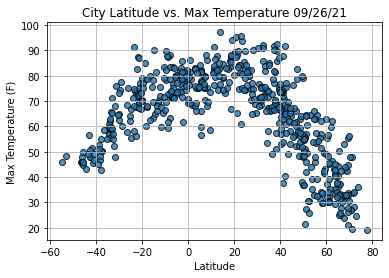

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the scatter plot latitude vs. max temperature
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

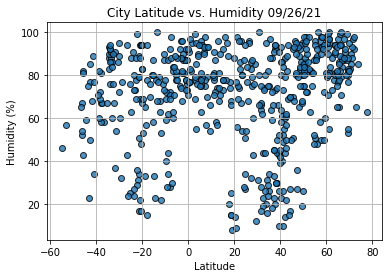

In [17]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the scatter plot latitude vs. humidity
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

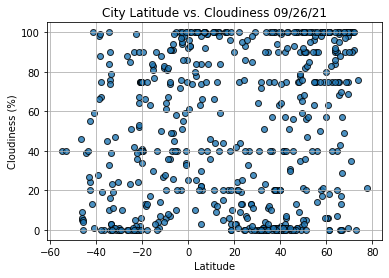

In [18]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the scatter plot latitude vs. cloudiness
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

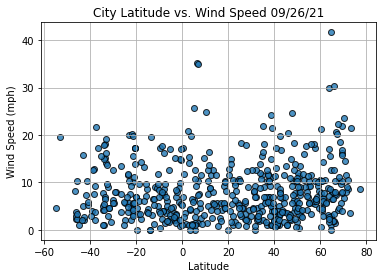

In [19]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the scatter plot latitude vs. cloudiness
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()